In [392]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [321]:
data=pd.read_csv("mushrooms.csv",na_values='?')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [322]:
data.shape

(8124, 23)

We have 8124 rows and 23 columns in our dataset

In [323]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [324]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [325]:
data.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [326]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

There are null values present in stalk-root column

In [327]:
for col in data:
    print(col,data[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


There is only one value for veil-type, so we can drop it

<AxesSubplot:xlabel='class', ylabel='count'>

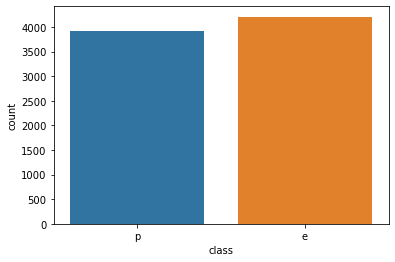

In [328]:
sns.countplot(x='class',data=data)

Dataset is perfectly balanced

In [329]:
data.drop('veil-type',axis=1,inplace=True)

In [330]:
data.shape

(8124, 22)

In [331]:
import numpy as np
data['stalk-root'].fillna(data['stalk-root'].mode()[0],inplace=True)

We have replaced null value with mode as it is categorical data

<AxesSubplot:>

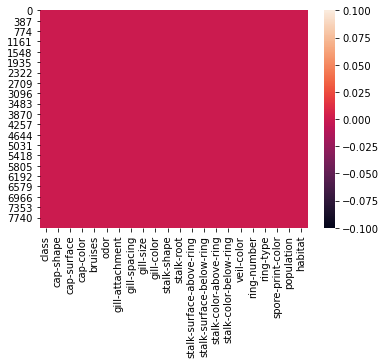

In [332]:
sns.heatmap(data.isnull())

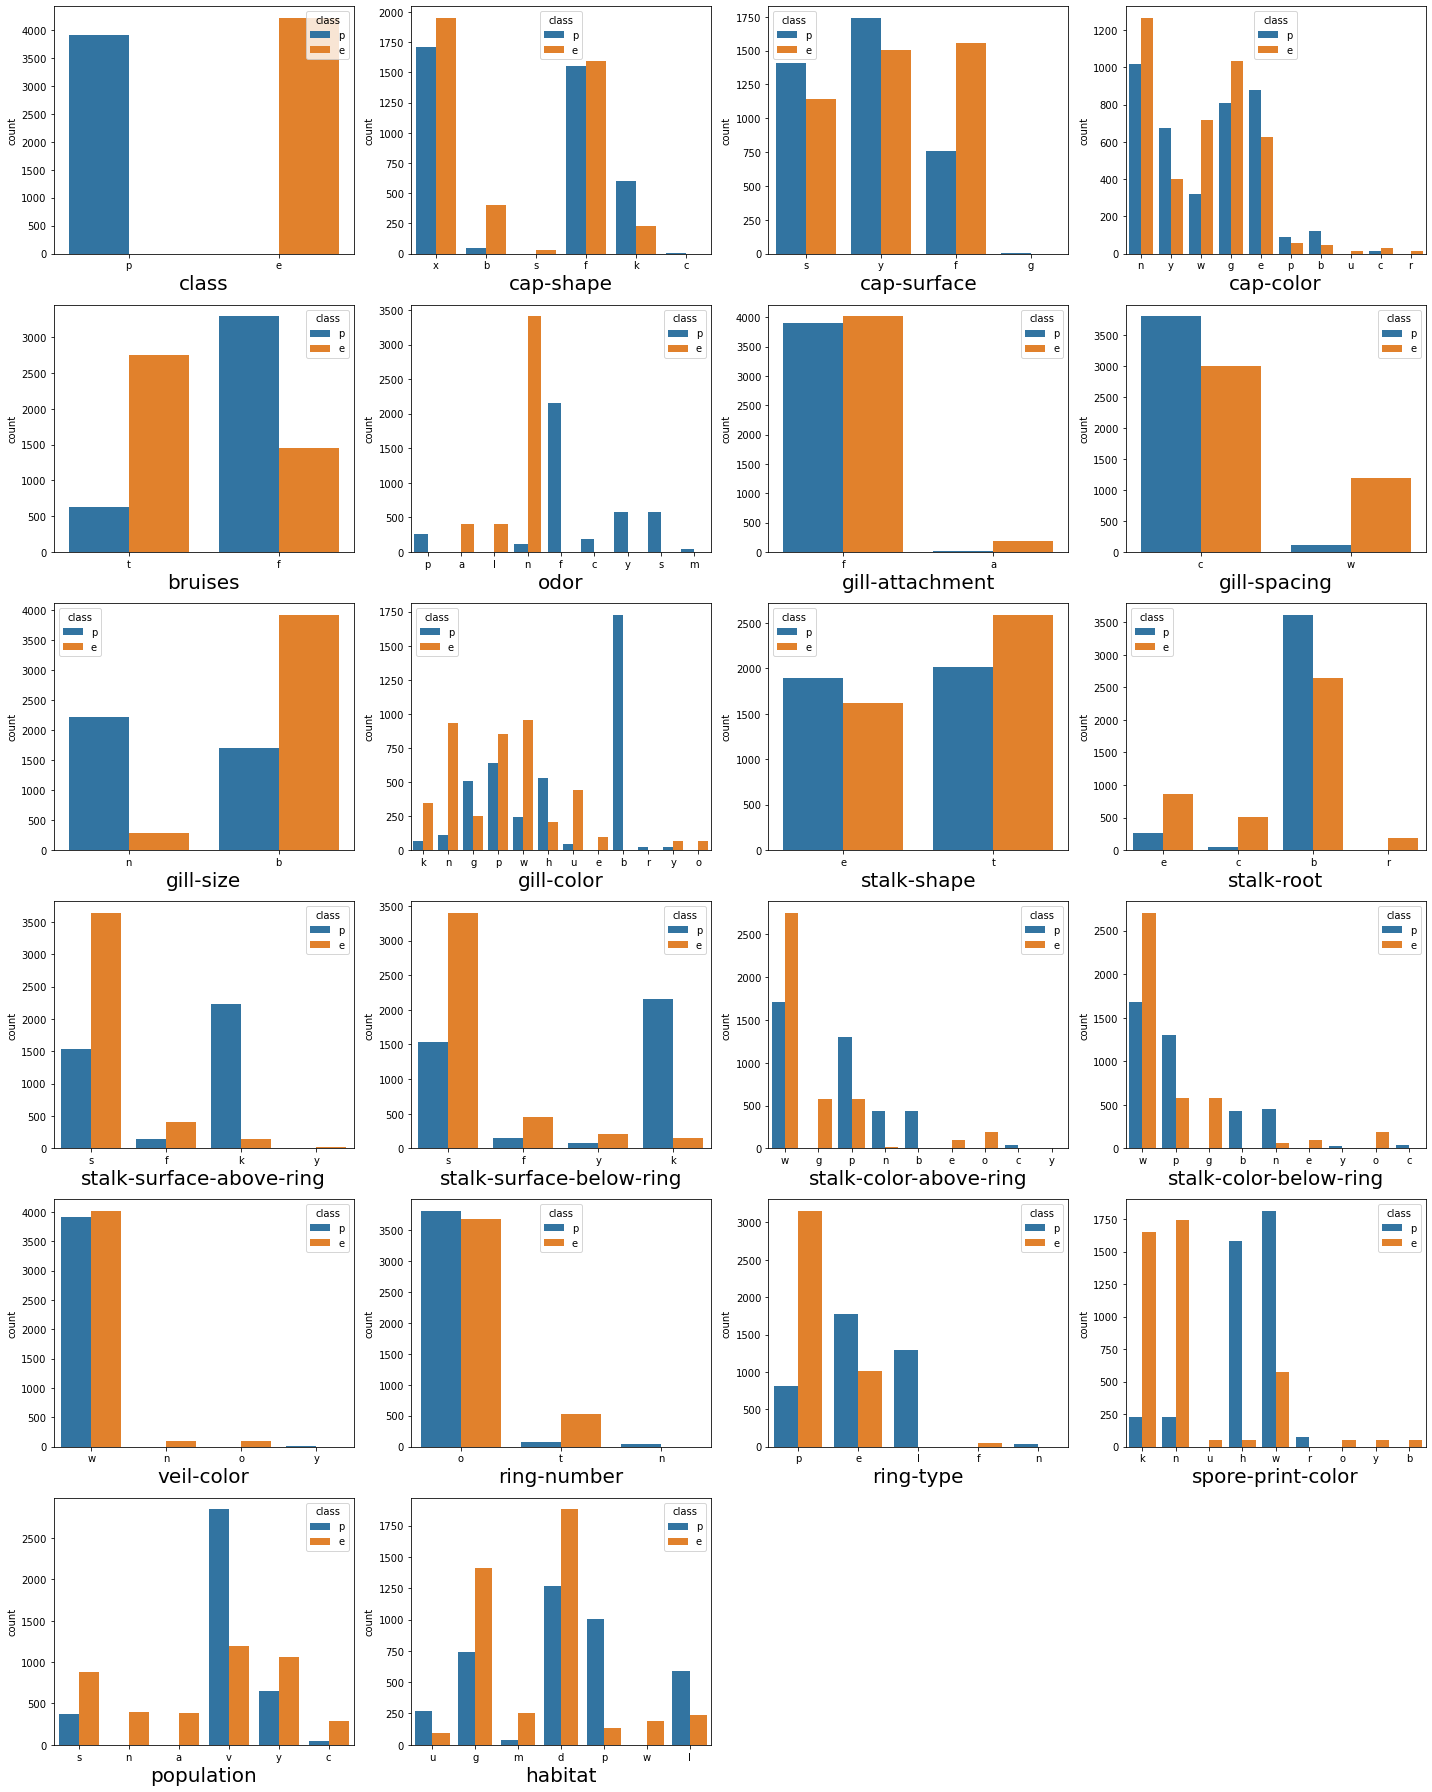

In [333]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=22:
        ax=plt.subplot(6,4,plotnumber)
        sns.countplot(x =data[column], hue = "class", data = data)        
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
    

We can infer from the above plot that which mushroom is more poisonous andwhich type of mushroom is more edible

In [408]:
#Performing Label Encoding for the dataset
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])    

In [335]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [336]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [409]:
#Separting features and target variable
x=data.drop('class',axis=1)
y=data.iloc[:,0:1]


In [348]:
x.shape

(8124, 21)

In [349]:
y.shape

(8124, 1)

In [410]:
#splitting data into training and testing datasets
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=43)

In [353]:
train_x.shape

(6336, 21)

In [354]:
train_y.shape

(6336, 1)

In [356]:
test_x.shape

(1788, 21)

In [357]:
test_y.shape

(1788, 1)

DecisionTreeClassifier()
1.0
[[916   0]
 [  0 872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



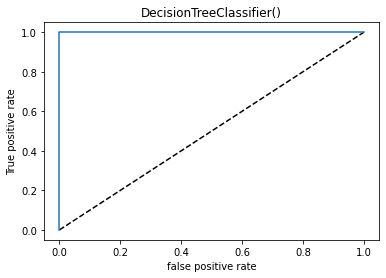

auc_score: 1.0


KNeighborsClassifier()
0.9994407158836689
[[915   1]
 [  0 872]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916
           1       1.00      1.00      1.00       872

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



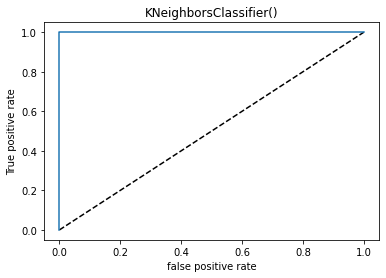

auc_score: 0.9994541484716157


MultinomialNB()
0.8232662192393736
[[870  46]
 [270 602]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       916
           1       0.93      0.69      0.79       872

    accuracy                           0.82      1788
   macro avg       0.85      0.82      0.82      1788
weighted avg       0.84      0.82      0.82      1788



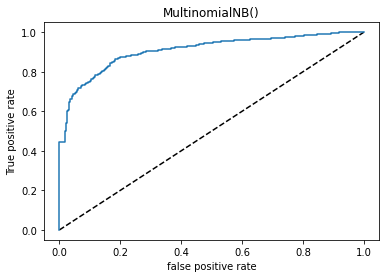

auc_score: 0.8200743159328553


LogisticRegression()
0.9546979865771812
[[886  30]
 [ 51 821]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       916
           1       0.96      0.94      0.95       872

    accuracy                           0.95      1788
   macro avg       0.96      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788



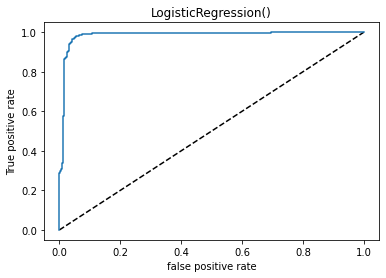

auc_score: 0.9543813348824165




In [397]:
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.neighbors import KNeighborsClassifier as knn
model=[DecisionTreeClassifier(),KNeighborsClassifier(),MultinomialNB(),LogisticRegression()]

for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(m)
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    y_pred_prob=m.predict_proba(test_x)[:,1]
    fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('false positive rate')
    plt.ylabel('True positive rate')
    plt.title(m)
    plt.show()
    auc_score=roc_auc_score(test_y,m.predict(test_x))
    print("auc_score:" ,auc_score)
    print("\n")

In [398]:
from sklearn.model_selection import cross_val_score


In [401]:
mnb=MultinomialNB()
mnbscores=cross_val_score(mnb,x,y,cv=5)
print(mnbscores)
print(mnbscores.mean(),mnbscores.std())

[0.62215385 0.68307692 0.72984615 0.99753846 0.68780788]
0.7440846532777567 0.1312994346286514


In [402]:
dtc=DecisionTreeClassifier()
dtscores=cross_val_score(dtc,x,y,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.88184615 1.         1.         1.         0.68472906]
0.9133150435771127 0.1231135135330191


In [403]:
knn=KNeighborsClassifier()
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.84492308 0.99753846 0.93107692 1.         0.64224138]
0.8831559681697613 0.13306682049345228


In [406]:
lg=LogisticRegression()
lgscores=cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.76615385 0.98830769 0.87569231 0.99876923 0.78940887]
0.8836663887836302 0.09690792608931943


Since, Logistic Regression have the least difference between accuracy and cross val score, we can say Logistic Regression is the best model

In [407]:
import joblib
joblib.dump(lg,'lgfile.obj')


['lgfile.obj']